<a href="https://colab.research.google.com/github/NikitaMarnykh/karnegie_mellon_university_machine_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D1%83%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%9A%D0%B0%D1%80%D0%BD%D0%B5%D0%B3%D0%B8_%D0%9C%D0%B5%D0%BB%D0%BE%D0%BD_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи и описание датасета

Предоставлены данные моделей автомобилей с некоторыми их характеристиками, собранные в 1983 году в университете Карнеги-Мелон.

Информация, содержащаяся в датасете:
* mpg – расход топлива (в милях на галлон);
* cylinders – число цилиндров в двигателе;
* displacement – объем двигателя (в кубических дюймах);
* horsepower – мощность (в лошадиных силах);
* weight – масса автомобиля (в фунтах);
* acceleration – разгон до 60 миль/час (в секундах);
* model year – год выпуска модели;
* origin – регион производства (1 – США, 2 – Европа, 3 – Юго-Восточная Азия);
* car name – наименование модели.

Исходные данные:

Датасет с автомобилями (файл в формате csv по ссылке: https://drive.google.com/file/d/1C7fHqALXokyvZZZIn1aMkjyaDWXdAbIy/view?usp=sharing).

Задачи:  
* построить минимум две регрессионные модели регрессии (линейную и нелинейную,
приведенную к линейной с помощью линеаризации) взаимосвязи целевого показателя
mpg и других факторов (cylinders, displacement, horsepower, weight, acceleration, model year,
origin, car name);  
* сравнить качество построенных моделей;
* сделать прогноз.

## 2. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [464]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install missingno

Подключаем все необходимые зависимости

In [465]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

Подгружаем репозиторий для работы с ним

In [466]:
!git clone https://github.com/NikitaMarnykh/karnegie_mellon_university_machine_analysis

Cloning into 'karnegie_mellon_university_machine_analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 276.62 KiB | 4.39 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Перейдём в установленный репозиторий

In [467]:
%cd karnegie_mellon_university_machine_analysis/

/content/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis/karnegie_mellon_university_machine_analysis


## 3. Первичный обзор датасета. Оценка размеров датасета, наличия дубликатов и пропусков

Сохраняем датасет в переменную

In [468]:
dataset = pd.read_csv('auto-mpg.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True)

Проведём обзор содержимого таблицы

In [469]:
dataset.head(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


Оценим размеры датасета

In [470]:
dataset.shape

(398, 9)

Оценим наличие полных дубликатов в датасете

In [471]:
dataset.duplicated(keep=False).sum()

np.int64(0)

Оценим наличие пропущенных значений в датасете

In [472]:

dataset.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


Визуализируем пропуски

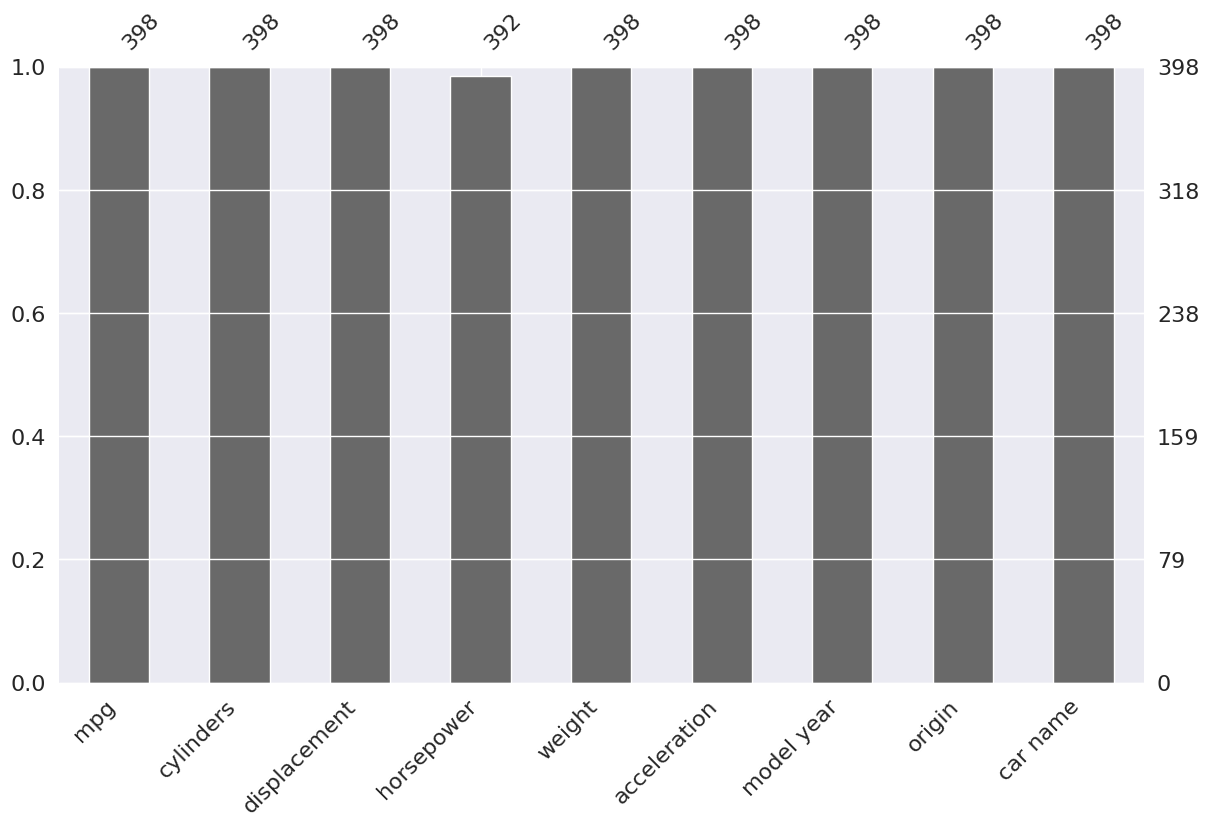

In [473]:
sns.set()
msno.bar(dataset, figsize=(14, 8))
plt.show()

Просмотрим информацию о датасете

In [474]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по предварительному осмотру:

  * О размерах датасета:

      - 398 строк (наблюдений), 9 столбцов (признаков)

  * О типах данных:

    - Количественные признаки:

      * miles per gallon (mpg)

      * cylinders

      * displacement

      * horsepower

      * weight

      * acceleration

      * model year

      * origin

    - Категориальные признаки:

      * car name

  * О дубликатах:

    - Полные дубликаты отсутствуют

  * О пропущенных значениях:

    - В большинстве признаков пропусков нет.

    - Пропущенные значения (в количестве 6) присутствуют в признаке horsepower.

    - Возможно на этапе обработки признаков появятся нулевые значения там, где их быть не должно.



## 4. Предобработка данных

### 4.1 Признак mpg

Запишем имя признака в переменную sign

In [475]:
sign = 'mpg'

Выведем признак для просмотра содержимого

In [476]:
dataset[sign].head(10)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0
6,14.0
7,14.0
8,14.0
9,15.0


Выведем уникальные значения

In [477]:
dataset[sign].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

Выведем количество уникальных значений

In [478]:
dataset[sign].unique().shape

(129,)

Посмотрим наличие дубликатов

In [479]:
dataset.duplicated(subset=sign).sum()

np.int64(269)

Построим графически на пропущенные значения

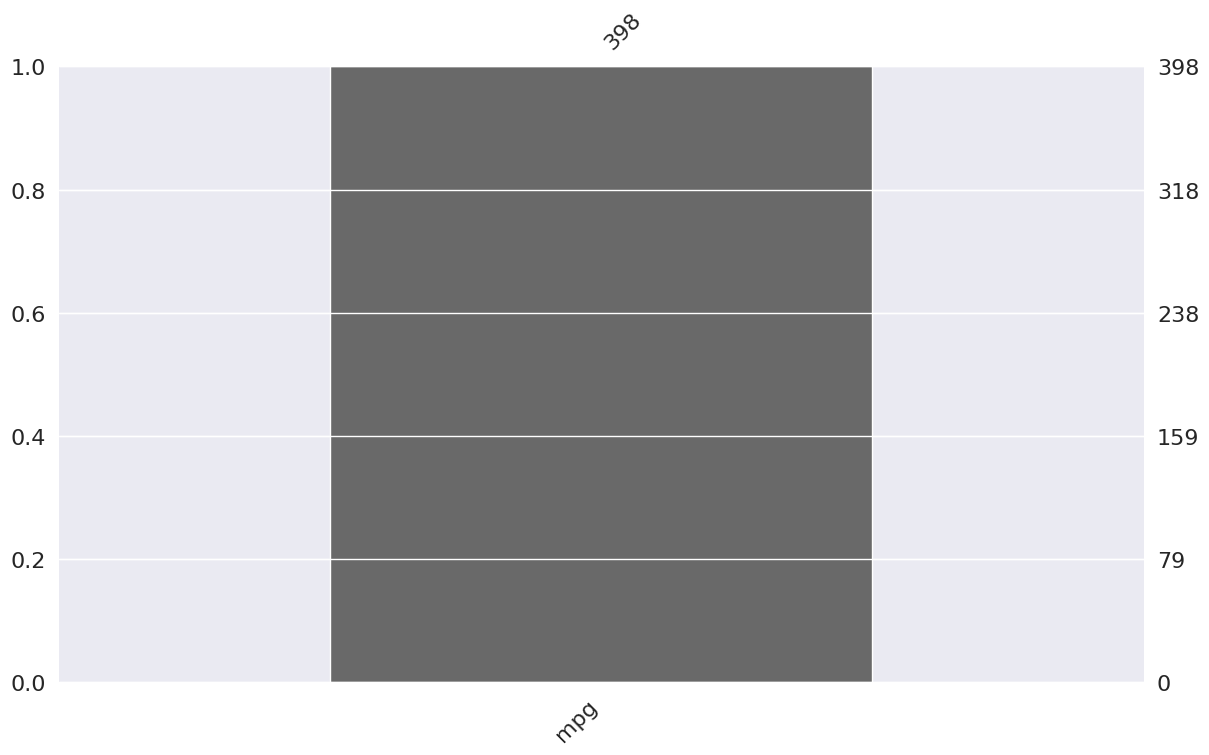

In [480]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [481]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.2 Признак cylinders

Запишем имя признака в переменную sign

In [482]:
sign = 'cylinders'

Выведем признак для просмотра содержимого

In [483]:
dataset[sign].head(10)

,cylinders
0,8
1,8
2,8
3,8
4,8
5,8
6,8
7,8
8,8
9,8


Выведем уникальные значения

In [484]:
dataset[sign].unique()

array([8, 4, 6, 3, 5])

Выведем количество уникальных значений

In [485]:
dataset[sign].unique().shape

(5,)

Посмотрим наличие дубликатов

In [486]:
dataset.duplicated(subset=sign).sum()

np.int64(393)

Построим графически на пропущенные значения

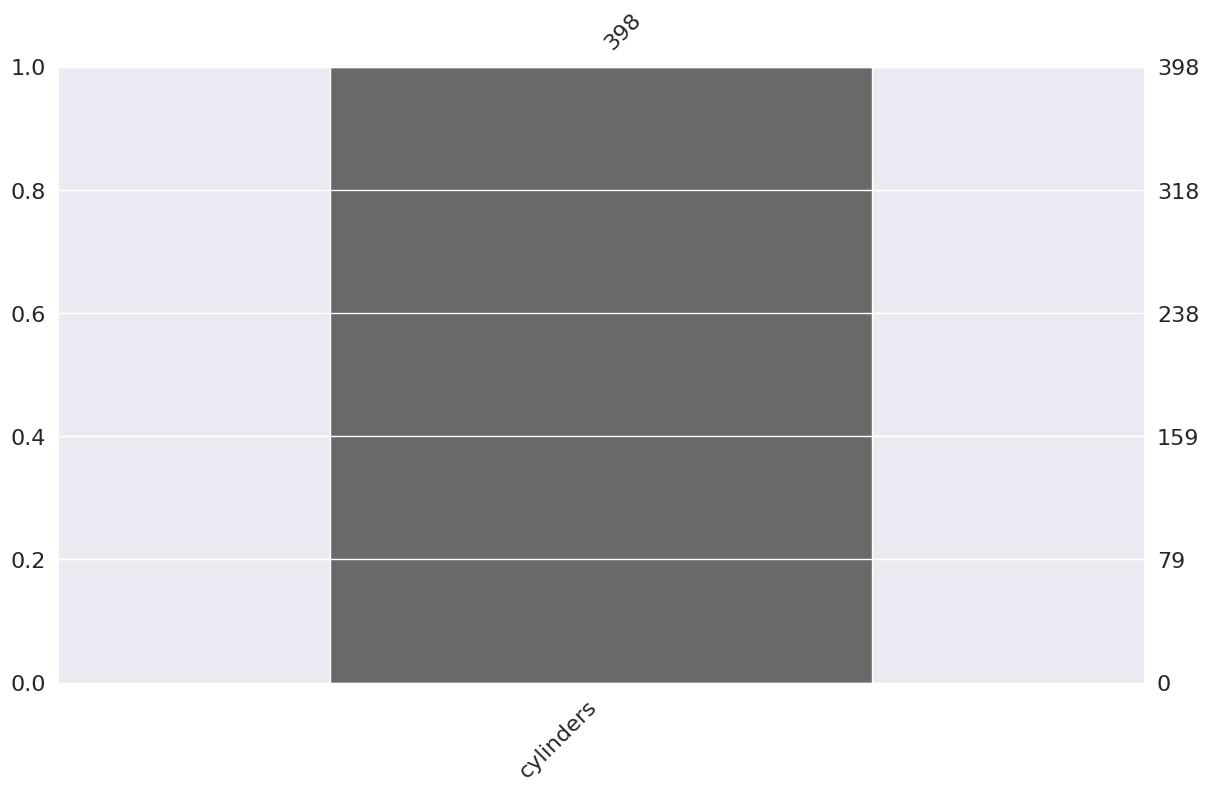

In [487]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [488]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.3 Признак displacement

Запишем имя признака в переменную sign

In [489]:
sign = 'displacement'

Выведем признак для просмотра содержимого

In [490]:
dataset[sign].head(10)

,displacement
0,307.0
1,350.0
2,318.0
3,304.0
4,302.0
5,429.0
6,454.0
7,440.0
8,455.0
9,390.0


Выведем уникальные значения

In [491]:
dataset[sign].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

Выведем количество уникальных значений

In [492]:
dataset[sign].unique().shape

(82,)

Посмотрим наличие дубликатов

In [493]:
dataset.duplicated(subset=sign).sum()

np.int64(316)

Построим графически на пропущенные значения

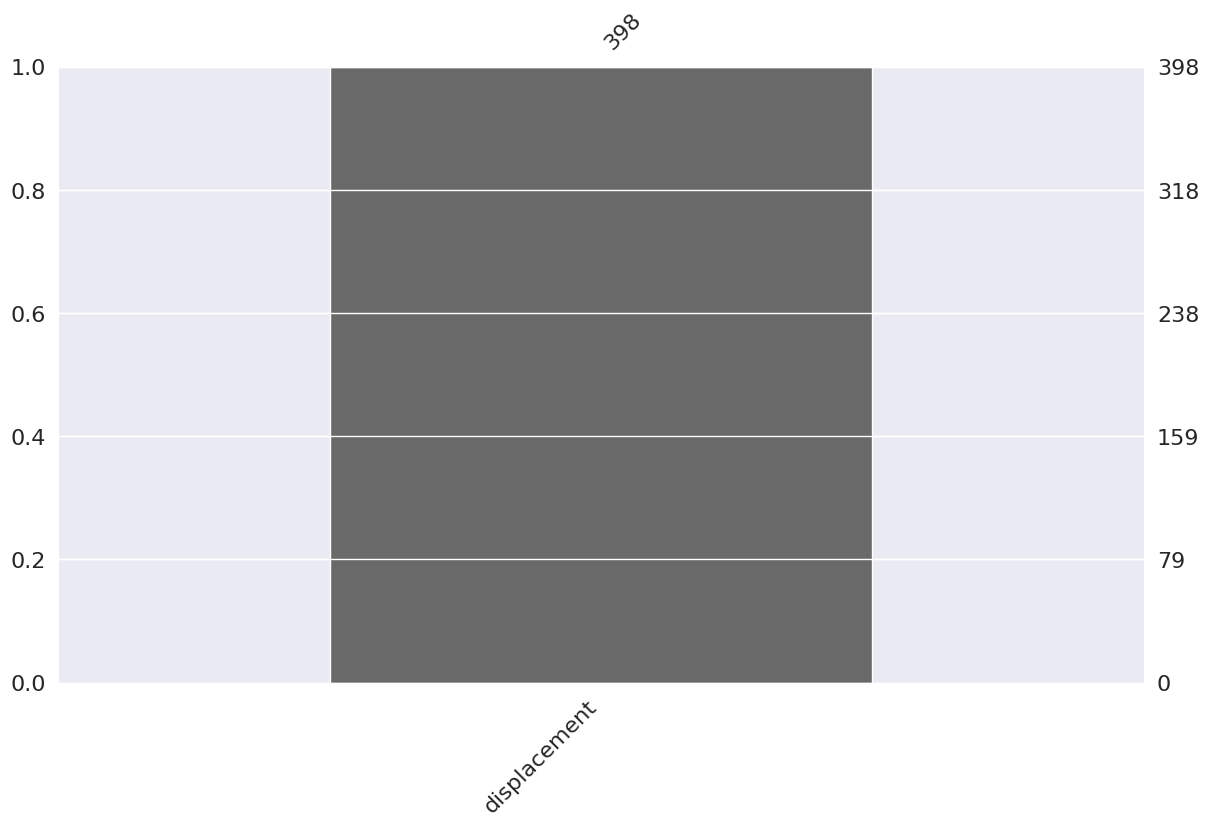

In [494]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [495]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.4 Признак horsepower

Запишем имя признака в переменную sign

In [496]:
sign = 'horsepower'

Выведем признак для просмотра содержимого

In [497]:
dataset[sign].head(10)

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
5,198.0
6,220.0
7,215.0
8,225.0
9,190.0


Выведем уникальные значения

In [498]:
dataset[sign].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

Выведем количество уникальных значений

In [499]:
dataset[sign].unique().shape

(94,)

Посмотрим наличие дубликатов

In [500]:
dataset.duplicated(subset=sign).sum()

np.int64(304)

Построим графически на пропущенные значения

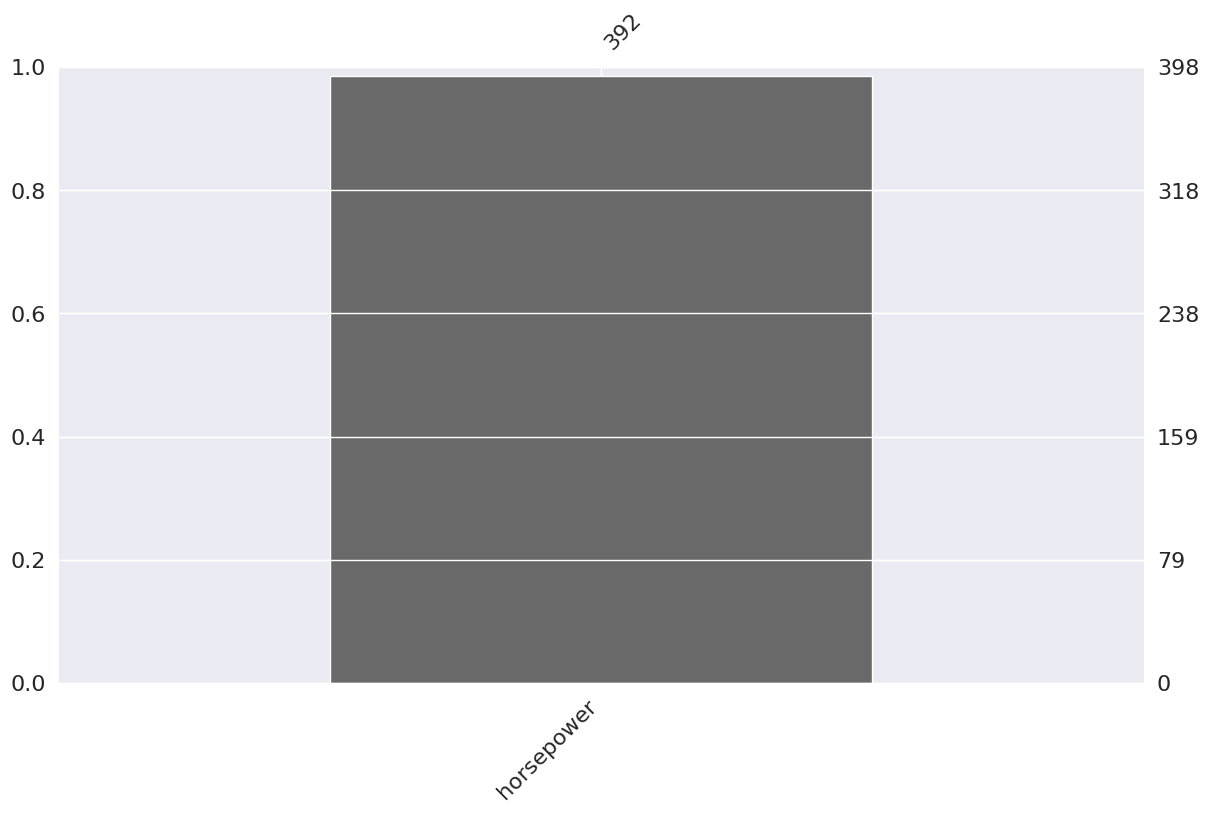

In [501]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Построим матрицу пропущенных значений

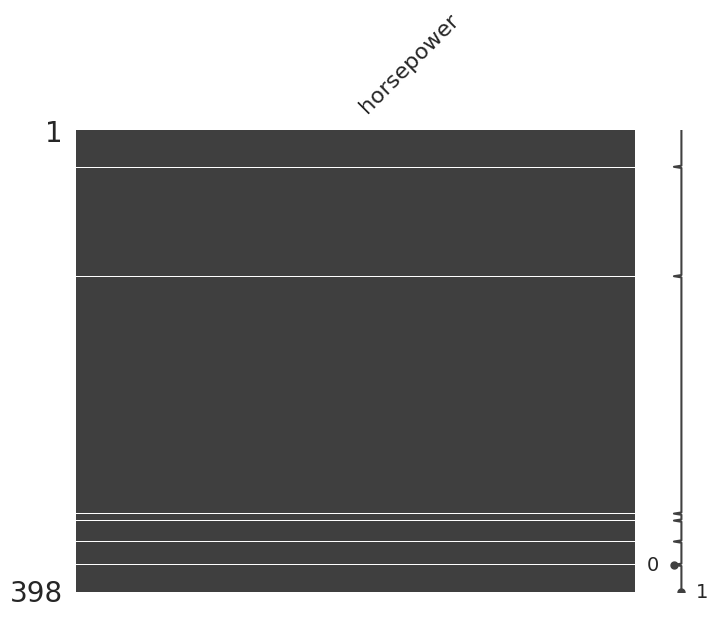

In [502]:
msno.matrix(dataset[[sign]], figsize=(8, 6))
plt.show()

Посмотрим у каких машин пропуски

In [503]:
dataset[dataset[sign].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


Заполним пропуски основываясь на информации найденой в интернете:

  * https://www.automobile-catalog.com/make/ford_usa/pinto/pinto_2-door_sedan/1971.html

  * https://www.automobile-catalog.com/car/1974/985790/ford_maverick_gt.html

  * https://www.automobile-catalog.com/car/1983/2928260/renault_le_car_4-door.html

  * https://www.automobile-catalog.com/make/ford_usa/mustang_3gen/mustang_3gen_cobra/1980.html

  * https://www.automobile-catalog.com/make/renault/18/18i_wagon/1981.html

  * https://www.automobile-catalog.com/make/amc/concord/concord_2-door_dl/1982.html




In [504]:
horsepower_corrections = {
    'ford pinto': 75,
    'ford maverick': 135,
    'renault lecar deluxe': 51,
    'ford mustang cobra': 120,
    'renault 18i': 82,
    'amc concord dl': 110,
}

missing_mask = dataset[sign].isnull()
dataset.loc[missing_mask, sign] = dataset.loc[missing_mask, 'car name'].map(horsepower_corrections)

Проверим устанение пропусков

In [505]:
dataset[dataset[sign].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


Посмотрим информацию о датасете

In [506]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - В признаке были обнаружены пропуски

  - Пропущенные значения были восстановлены с помощью информации из интернета

  - После обработки количество признаков и наблюдений не изменилось

### 4.5 Признак weight

Запишем имя признака в переменную sign

In [507]:
sign = 'weight'

Выведем признак для просмотра содержимого

In [508]:
dataset[sign].head(10)

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
5,4341
6,4354
7,4312
8,4425
9,3850


Выведем уникальные значения

In [509]:
dataset[sign].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

Выведем количество уникальных значений

In [510]:
dataset[sign].unique().shape

(351,)

Посмотрим наличие дубликатов

In [511]:
dataset.duplicated(subset=sign).sum()

np.int64(47)

Построим графически на пропущенные значения

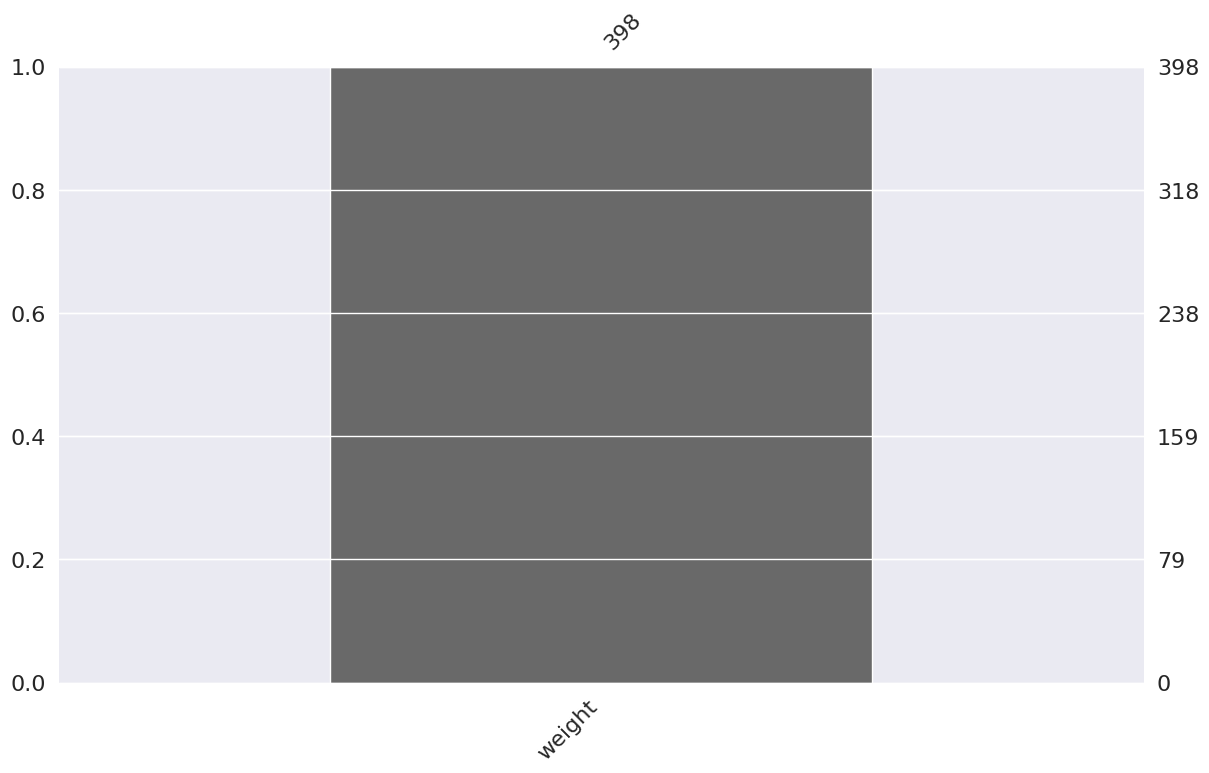

In [512]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [513]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.6 Признак acceleration

Запишем имя признака в переменную sign

In [514]:
sign = 'acceleration'

Выведем признак для просмотра содержимого

In [515]:
dataset[sign].head(10)

,acceleration
0,12.0
1,11.5
2,11.0
3,12.0
4,10.5
5,10.0
6,9.0
7,8.5
8,10.0
9,8.5


Выведем уникальные значения

In [516]:
dataset[sign].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

Выведем количество уникальных значений

In [517]:
dataset[sign].unique().shape

(95,)

Посмотрим наличие дубликатов

In [518]:
dataset.duplicated(subset=sign).sum()

np.int64(303)

Построим графически на пропущенные значения

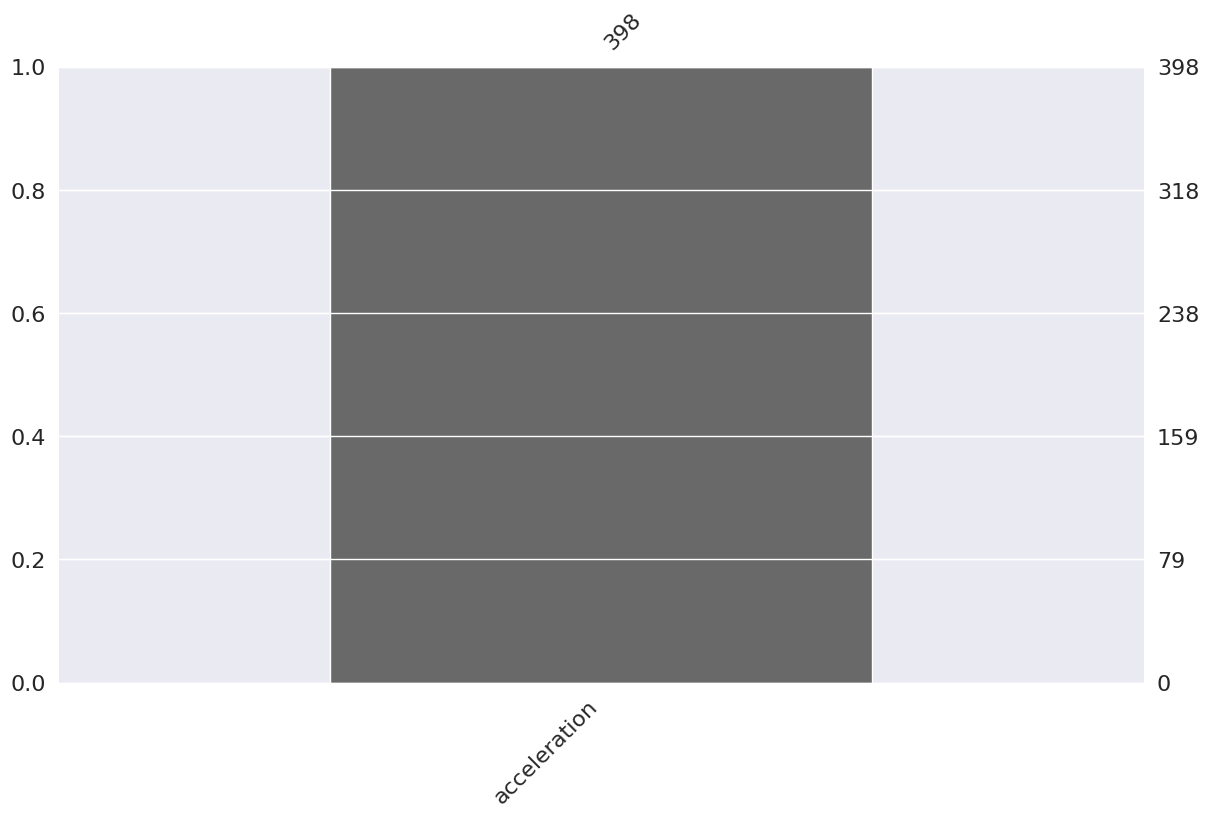

In [519]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [520]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.7 Признак model year

Запишем имя признака в переменную sign

In [521]:
sign = 'model year'

Выведем признак для просмотра содержимого

In [522]:
dataset[sign].head(10)

,model year
0,70
1,70
2,70
3,70
4,70
5,70
6,70
7,70
8,70
9,70


Выведем уникальные значения

In [523]:
dataset[sign].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

Выведем количество уникальных значений

In [524]:
dataset[sign].unique().shape

(13,)

Посмотрим наличие дубликатов

In [525]:
dataset.duplicated(subset=sign).sum()

np.int64(385)

Построим графически на пропущенные значения

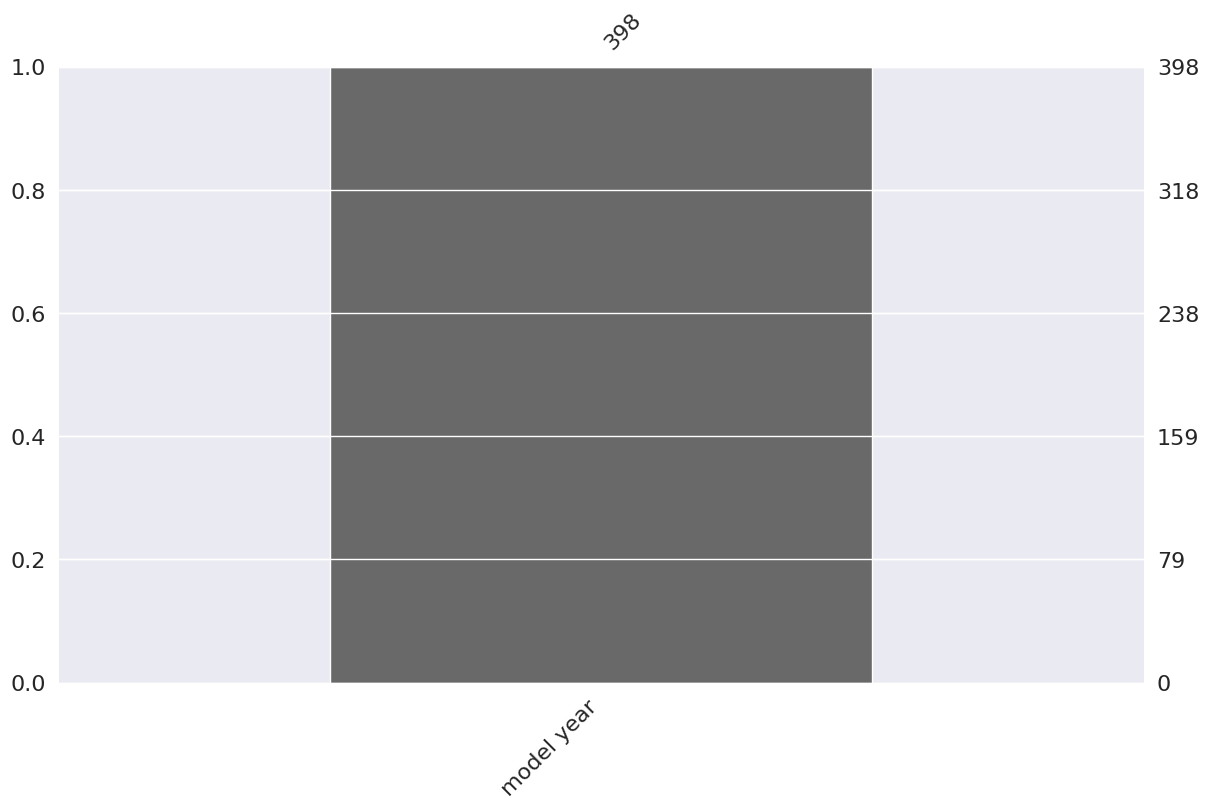

In [526]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [527]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.8 Признак origin





Запишем имя признака в переменную sign

In [528]:
sign = 'origin'

Выведем признак для просмотра содержимого

In [529]:
dataset[sign].head(10)

,origin
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Выведем уникальные значения

In [530]:
dataset[sign].unique()

array([1, 3, 2])

Выведем количество уникальных значений

In [531]:
dataset[sign].unique().shape

(3,)

Посмотрим наличие дубликатов

In [532]:
dataset.duplicated(subset=sign).sum()

np.int64(395)

Построим графически на пропущенные значения

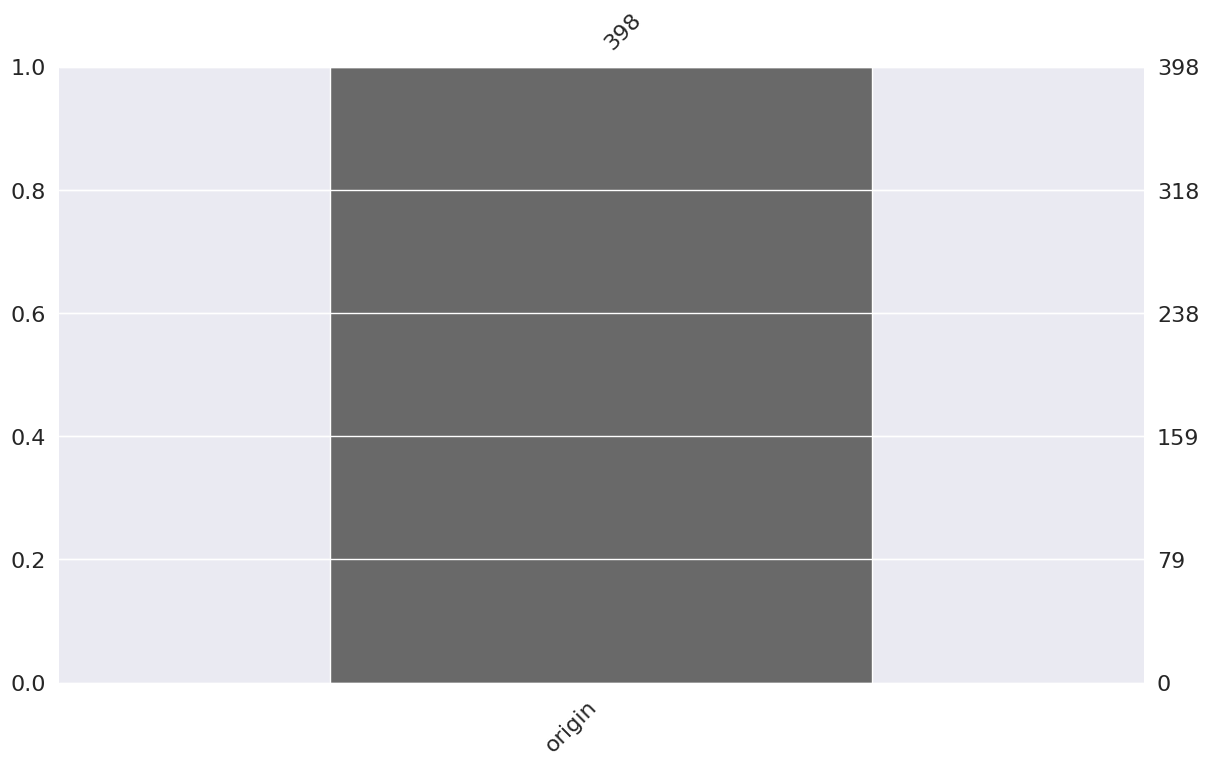

In [533]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Приведём признак к типу category

In [534]:
origin_mapping = {1: 'USA', 2: 'Europe', 3: 'Asia'}
origin_dummies = pd.get_dummies(
    dataset[sign].map(origin_mapping),
    prefix=sign
)
dataset.drop(columns=[sign], inplace=True)
dataset = pd.concat([dataset, origin_dummies], axis=1)

Посмотрим информациб о датасете

In [535]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   car name       398 non-null    object 
 8   origin_Asia    398 non-null    bool   
 9   origin_Europe  398 non-null    bool   
 10  origin_USA     398 non-null    bool   
dtypes: bool(3), float64(4), int64(3), object(1)
memory usage: 26.2+ KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - Было применено Dummy-кодирование

  - После обработки количество признаков увеличилось на два, а наблюдений не изменилось

### 4.9 Признак car name

Запишем имя признака в переменную sign

In [536]:
sign = 'car name'

Удалим признак

In [537]:
dataset.drop(columns=sign, inplace=True)
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,origin_USA
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,False,True,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


Посмотрим информациб о датасете

In [538]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin_Asia    398 non-null    bool   
 8   origin_Europe  398 non-null    bool   
 9   origin_USA     398 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 23.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - Количество наблюдений после обработки признака не изменилось, а признаков уменьшилось на один

  - Признак удалён

## 5. Датасет после предобработки

Признаки, которые будут использованы для дальнейшего анализа:

  * Количественные признаки:
  
    - mpg

    - cylinders

    - displacement

    - horsepower

    - weight

    - acceleration

    - model year

  * Категориальные признаки:

    - origin_Asia

    - origin_Europe

    - origin_USA

Посмотрим на размеры датасета

In [539]:
dataset.shape

(398, 10)

Посмотрим количество пропусков в датасете

In [540]:
dataset.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin_Asia,0
origin_Europe,0
origin_USA,0


Посмотрим информацию о датасете

In [541]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model year     398 non-null    int64  
 7   origin_Asia    398 non-null    bool   
 8   origin_Europe  398 non-null    bool   
 9   origin_USA     398 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 23.1 KB
